# Predictive modeling of customer bookings

We have a dataset of 50000 customer booking observations stored in 14 variables. Based on the information we have to identify the hidden patterns in customer behavior and segment them into appripriate clusters. 

To provide more context on the dataset, below is a detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


## (A). Exploratory Data Analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
print(df.shape)
df.head()

(50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
# Check for any null values present

df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

We have 4 numberical variables: 
* num_passengers
* purchase_lead
* length_of_stay
* flight_duration

Let's check their description using .describe() function

In [5]:
df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']].describe()

,num_passengers,purchase_lead,length_of_stay,flight_duration
count,50000.000000,50000.000000,50000.00000,50000.000000
mean,1.591240,84.940480,23.04456,7.277561
std,1.020165,90.451378,33.88767,1.496863
min,1.000000,0.000000,0.00000,4.670000
25%,1.000000,21.000000,5.00000,5.620000
50%,1.000000,51.000000,17.00000,7.570000
75%,2.000000,115.000000,28.00000,8.830000
max,9.000000,867.000000,778.00000,9.500000


* Average number of paseenger per booking is: 1.59
* Average number of days before the travel day when the booking is made is: 84.94 days. This variable has some outliers, we'll check them later.
* Average lenght of stay per trip is 23 days. This column has outliers too.
* Average flight duration is 7.27 hours.

let's visualize the distribution of each column with respect to the data. 

### 1. num_passengers

In [6]:
df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

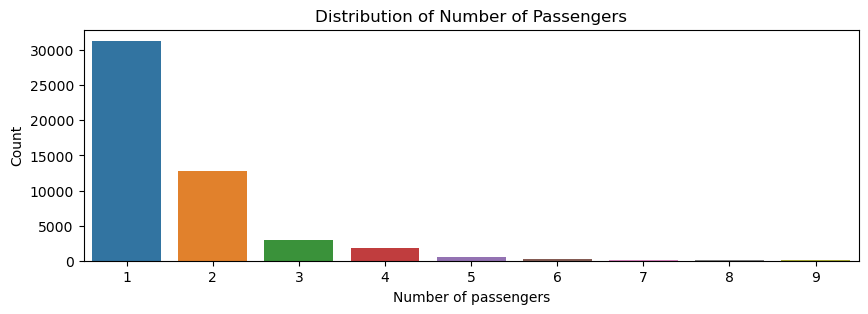

In [7]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['num_passengers'].value_counts().index, y= df['num_passengers'].value_counts().values)
plt.xlabel('Number of passengers')
plt.ylabel('Count')
plt.title('Distribution of Number of Passengers')
plt.show()

Most of the passengers like to fly alone. 

### 2. sales_channel

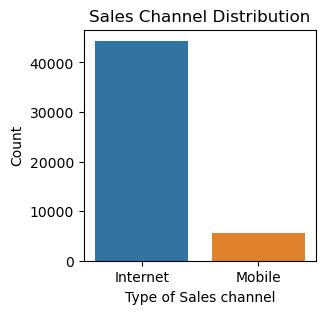

In [8]:
plt.figure(figsize= (3,3), dpi= 100)
sns.barplot(x= df['sales_channel'].value_counts().index, y= df['sales_channel'].value_counts().values)
plt.xlabel('Type of Sales channel')
plt.ylabel('Count')
plt.title('Sales Channel Distribution')
plt.show()

Mobile Booking is almost obsolete among customers.

### 3. trip_type

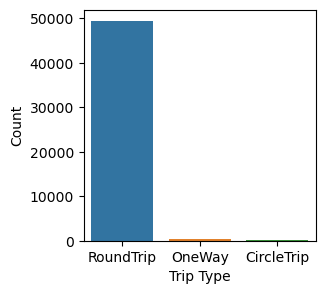

In [9]:
plt.figure(figsize= (3,3), dpi= 100)
sns.barplot(x= df['trip_type'].value_counts().index, y= df['trip_type'].value_counts().values)
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

Almost all the trips that are being booked are round trips. This shows people like to go on planned trips and are certain about their flying schedule.

### 4. purchase_lead

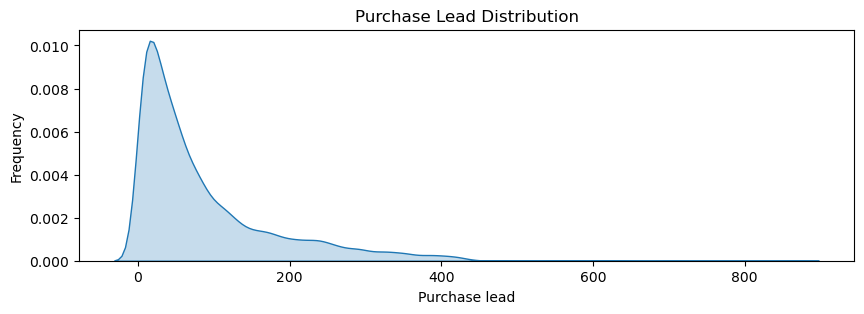

In [10]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(df['purchase_lead'], fill = True)
plt.xlabel('Purchase lead')
plt.ylabel('Frequency')
plt.title('Purchase Lead Distribution')
plt.show()

We can see some outliers present itn the data. Let's analyze them and remove them.

In [11]:
df[df['purchase_lead'] > 420].shape

(165, 14)

We have 165 such records which have a purchase lead of more than 420 days, i.e. 1 year

In [12]:
df[df['purchase_lead'] > 420]['booking_complete'].value_counts()

0    143
1     22
Name: booking_complete, dtype: int64

Maximum booking with purchase lead of more than 42 days have failed. For outliers, we're going to check the number of records which are beyond upper whisker value and remove them.

In [13]:
Q1 = df['purchase_lead'].quantile(0.25)
Q3 = df['purchase_lead'].quantile(0.75)
IQR = Q3 - Q1

mean = df['purchase_lead'].mean()

whisk = mean + 1.5*(IQR)

df = df[df['purchase_lead'] <= whisk]

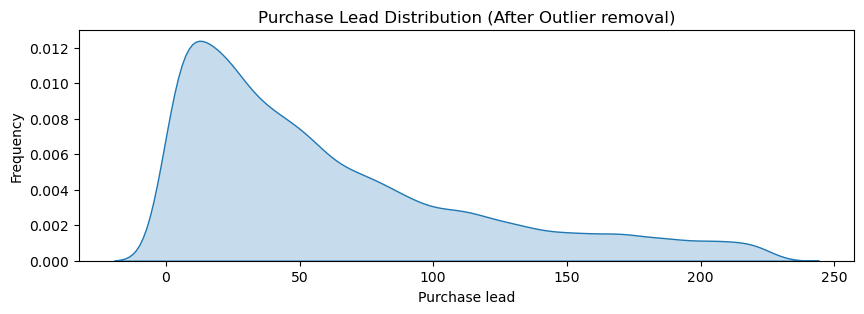

In [14]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(df['purchase_lead'], fill = True)
plt.xlabel('Purchase lead')
plt.ylabel('Frequency')
plt.title('Purchase Lead Distribution (After Outlier removal)')
plt.show()

Maximum people tend to make the booking in less than 20 days before the travel date.

### 5. length_of_stay

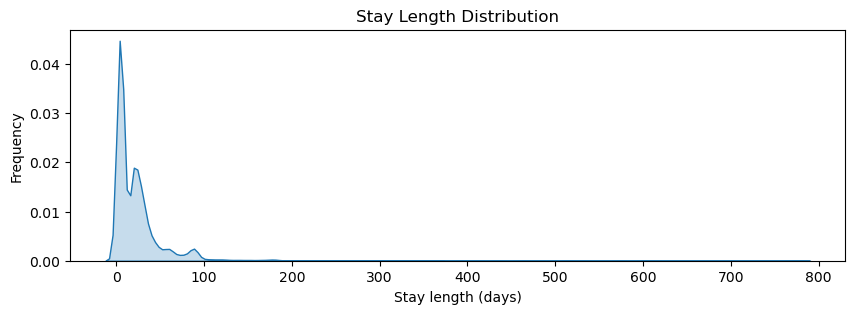

In [15]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(df['length_of_stay'], fill = True)
plt.xlabel('Stay length (days)')
plt.ylabel('Frequency')
plt.title('Stay Length Distribution')
plt.show()

In [16]:
# OUTLIER REMOVAL

Q1 = df['length_of_stay'].quantile(0.25)
Q3 = df['length_of_stay'].quantile(0.75)
IQR = Q3 - Q1

mean = df['length_of_stay'].mean()

whisk = mean + 1.5*(IQR)

df = df[df['length_of_stay'] <= whisk]

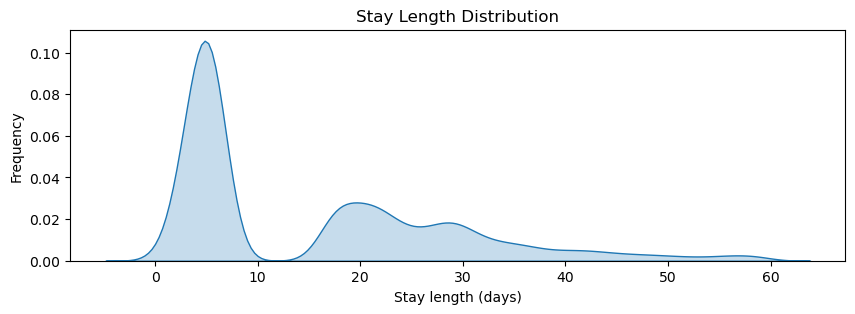

In [17]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(df['length_of_stay'], fill = True)
plt.xlabel('Stay length (days)')
plt.ylabel('Frequency')
plt.title('Stay Length Distribution')
plt.show()

A large number of trips last for less than 10 days, then we see a drastic drop in the frequency. A considerable amount of trips last between 17 days to 30 days.

### 6. flight_hour

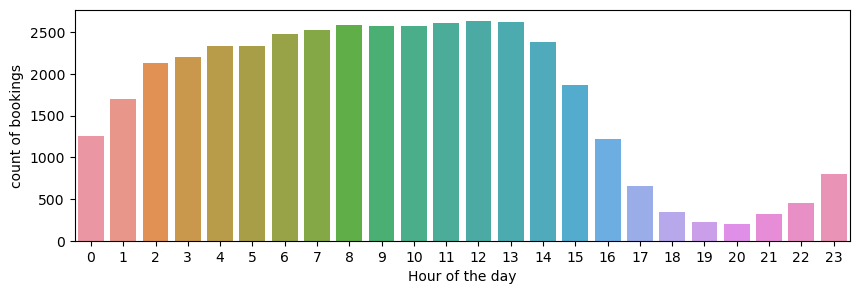

In [18]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['flight_hour'].value_counts().index, y = df['flight_hour'].value_counts().values)
plt.xlabel('Hour of the day')
plt.ylabel('count of bookings')
plt.show()

There are very less number of flights operating after 6PM as compared to day time. The number of flights start increasing after 1 o'clock in the early morning till 12 noon.

### 7. flight_day

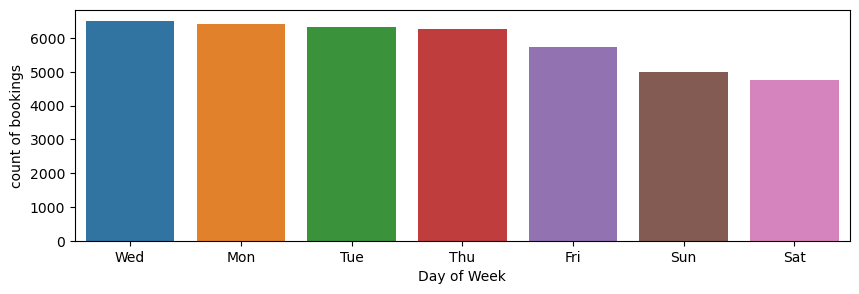

In [19]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['flight_day'].value_counts().index, y = df['flight_day'].value_counts().values)
plt.xlabel('Day of Week')
plt.ylabel('count of bookings')
plt.show()

### 8. route

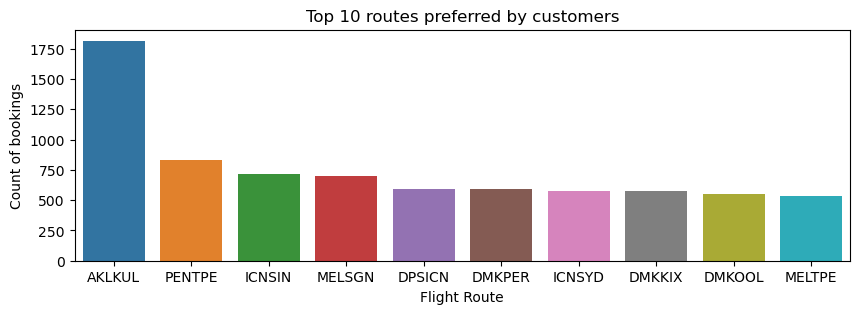

In [20]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['route'].value_counts()[:10].index, y = df['route'].value_counts()[:10].values)
plt.xlabel('Flight Route')
plt.ylabel('Count of bookings')
plt.title('Top 10 routes preferred by customers')
plt.show()

Most travelled route for the airline is: 
* Auckland to Kualalampur, followed by 
* Penang to Taipei, followed by
* Seoule to Singapore
* fourth most populer route among flyers is Melbourne to Ho Chi Minh City (Vietnam)

### 9. booking_origin

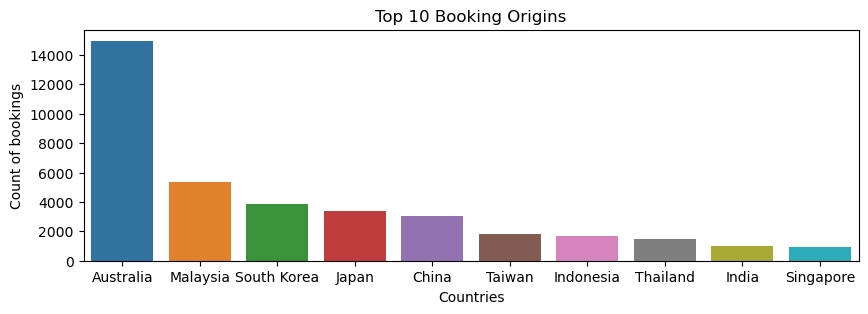

In [21]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['booking_origin'].value_counts()[:10].index, y = df['booking_origin'].value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Count of bookings')
plt.title('Top 10 Booking Origins')
plt.show()

By now we have a pretty clear idea that after Australia, British Airways is most popular among South Asian countries.

### 10. wants_extra_baggage

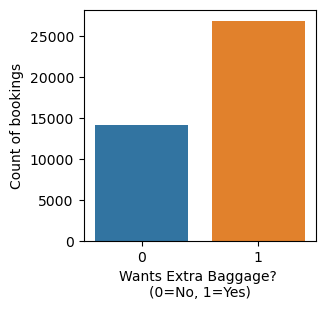

In [22]:
plt.figure(figsize= (3,3), dpi= 100)
sns.barplot(x= df['wants_extra_baggage'].value_counts().index, y = df['wants_extra_baggage'].value_counts().values)
plt.xlabel('Wants Extra Baggage? \n(0=No, 1=Yes)')
plt.ylabel('Count of bookings')
plt.show()

### 12. wants_in_flight_meals

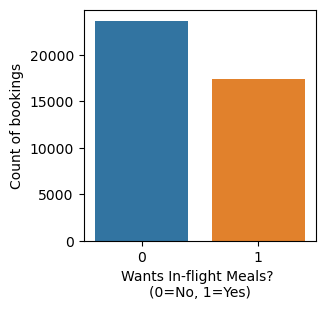

In [23]:
plt.figure(figsize= (3,3), dpi= 100)
sns.barplot(x= df['wants_in_flight_meals'].value_counts().index, y = df['wants_in_flight_meals'].value_counts().values)
plt.xlabel('Wants In-flight Meals? \n(0=No, 1=Yes)')
plt.ylabel('Count of bookings')
plt.show()

### 13. wants_preferred_seat

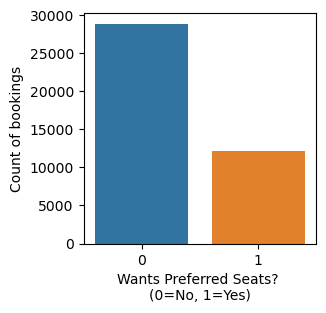

In [24]:
plt.figure(figsize= (3,3), dpi= 100)
sns.barplot(x= df['wants_preferred_seat'].value_counts().index, y = df['wants_preferred_seat'].value_counts().values)
plt.xlabel('Wants Preferred Seats? \n(0=No, 1=Yes)')
plt.ylabel('Count of bookings')
plt.show()

### 13. flight_duration

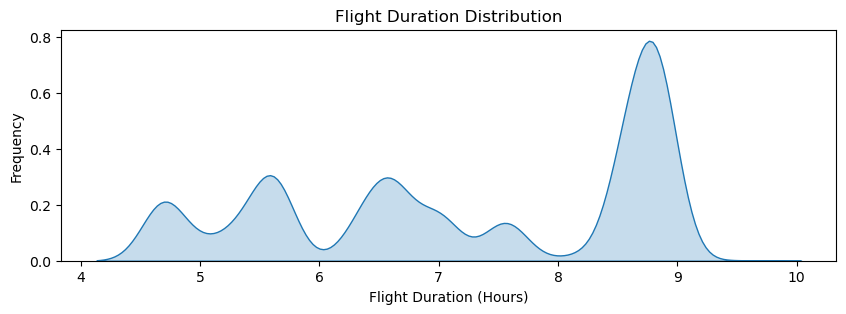

In [25]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(df['flight_duration'], fill = True)
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Frequency')
plt.title('Flight Duration Distribution')
plt.show()

Most of the flights take around 9 hours to travel from source to destiantion.

We have a pretty neat data with us which doesn't need any missing value impuration or any other data cleaning. We have already removed outliers and we can not go ahead with Preprocessing. We will first complete Encoding the Categorical Variables.

## (B). Data Preprocessing
### 1. Variable Encoding

In [26]:
encoded_df = df.copy()

Let's create an instance of LabelEncoder and define a list consisting names of categorical variables.

In [27]:
LE = LabelEncoder()
mapping = []
columns = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'route']

We will define a function first that encodes the variables. This function will create a list where all the categories for each variable will be mapped with the number it's been encoded in.

In [28]:
def encode_vars(column_list, data):
    
    for i in columns:
        data[str(i)] = LE.fit_transform(data[str(i)])
        cat_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
        mapping.append(cat_mapping)
    return mapping

In [29]:
x = encode_vars(columns, encoded_df)

In [30]:
encoded_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,0,2,112,20,3,2,0,59,0,0,0,5.52,0
3,1,0,2,96,31,4,2,0,59,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,35,1,0,1,5.52,0
5,1,0,2,3,48,20,4,0,59,1,0,1,5.52,0
6,3,0,2,201,33,6,4,0,59,1,0,1,5.52,0


After encoding we need to scale the data to feed it to the Algorithm. We will use StandardScaler()

### 2. Scaling

In [32]:
ss = StandardScaler()

scaled_matrix = ss.fit_transform(encoded_df)

scaled_df = pd.DataFrame(scaled_matrix, columns= df.columns)
scaled_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,-0.569555,-0.363309,0.096506,0.893636,0.330154,-1.127911,-0.531921,-1.766995,0.687057,-1.382319,-0.648994,-0.855879,-1.141084,-0.420281
1,-0.569555,-0.363309,0.096506,0.603796,1.142805,-0.941896,-0.531921,-1.766995,0.687057,-1.382319,-0.648994,1.168390,-1.141084,-0.420281
2,0.428077,-0.363309,0.096506,0.096575,0.477909,1.104268,1.422130,-1.766995,-0.059195,0.723422,-0.648994,1.168390,-1.141084,-0.420281
3,-0.569555,-0.363309,0.096506,-1.080901,2.398721,2.034342,0.445104,-1.766995,0.687057,0.723422,-0.648994,1.168390,-1.141084,-0.420281
4,1.425710,-0.363309,0.096506,2.505873,1.290560,-0.569866,0.445104,-1.766995,0.687057,0.723422,-0.648994,1.168390,-1.141084,-0.420281
